In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data preprocessing**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Coding Samurai/Task2/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.columns,df.shape

(Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
        'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
        'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
        'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager'],
       dtype='object'),
 (1470, 35))

In [ ]:
#Upon observing the dataset, we can predict that few columns have only 1 unique value, hence should be dropped(doesn't make sense to include it).
for col in df.columns:
  if(df[col].nunique()==1):
    print(col)
    df.drop(col,axis=1)
df.columns,df.shape

EmployeeCount
Over18
StandardHours


(Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
        'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
        'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
        'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager'],
       dtype='object'),
 (1470, 35))

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Attrition rate
attrition_rate=(df['Attrition'].value_counts()['Yes']*100)/df.shape[0]
print('Attrition rate: ',attrition_rate)

Attrition rate:  16.122448979591837


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EmployeeCount'}>],
       [<Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>],
       [<Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>],
       [<Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StandardHours'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axe

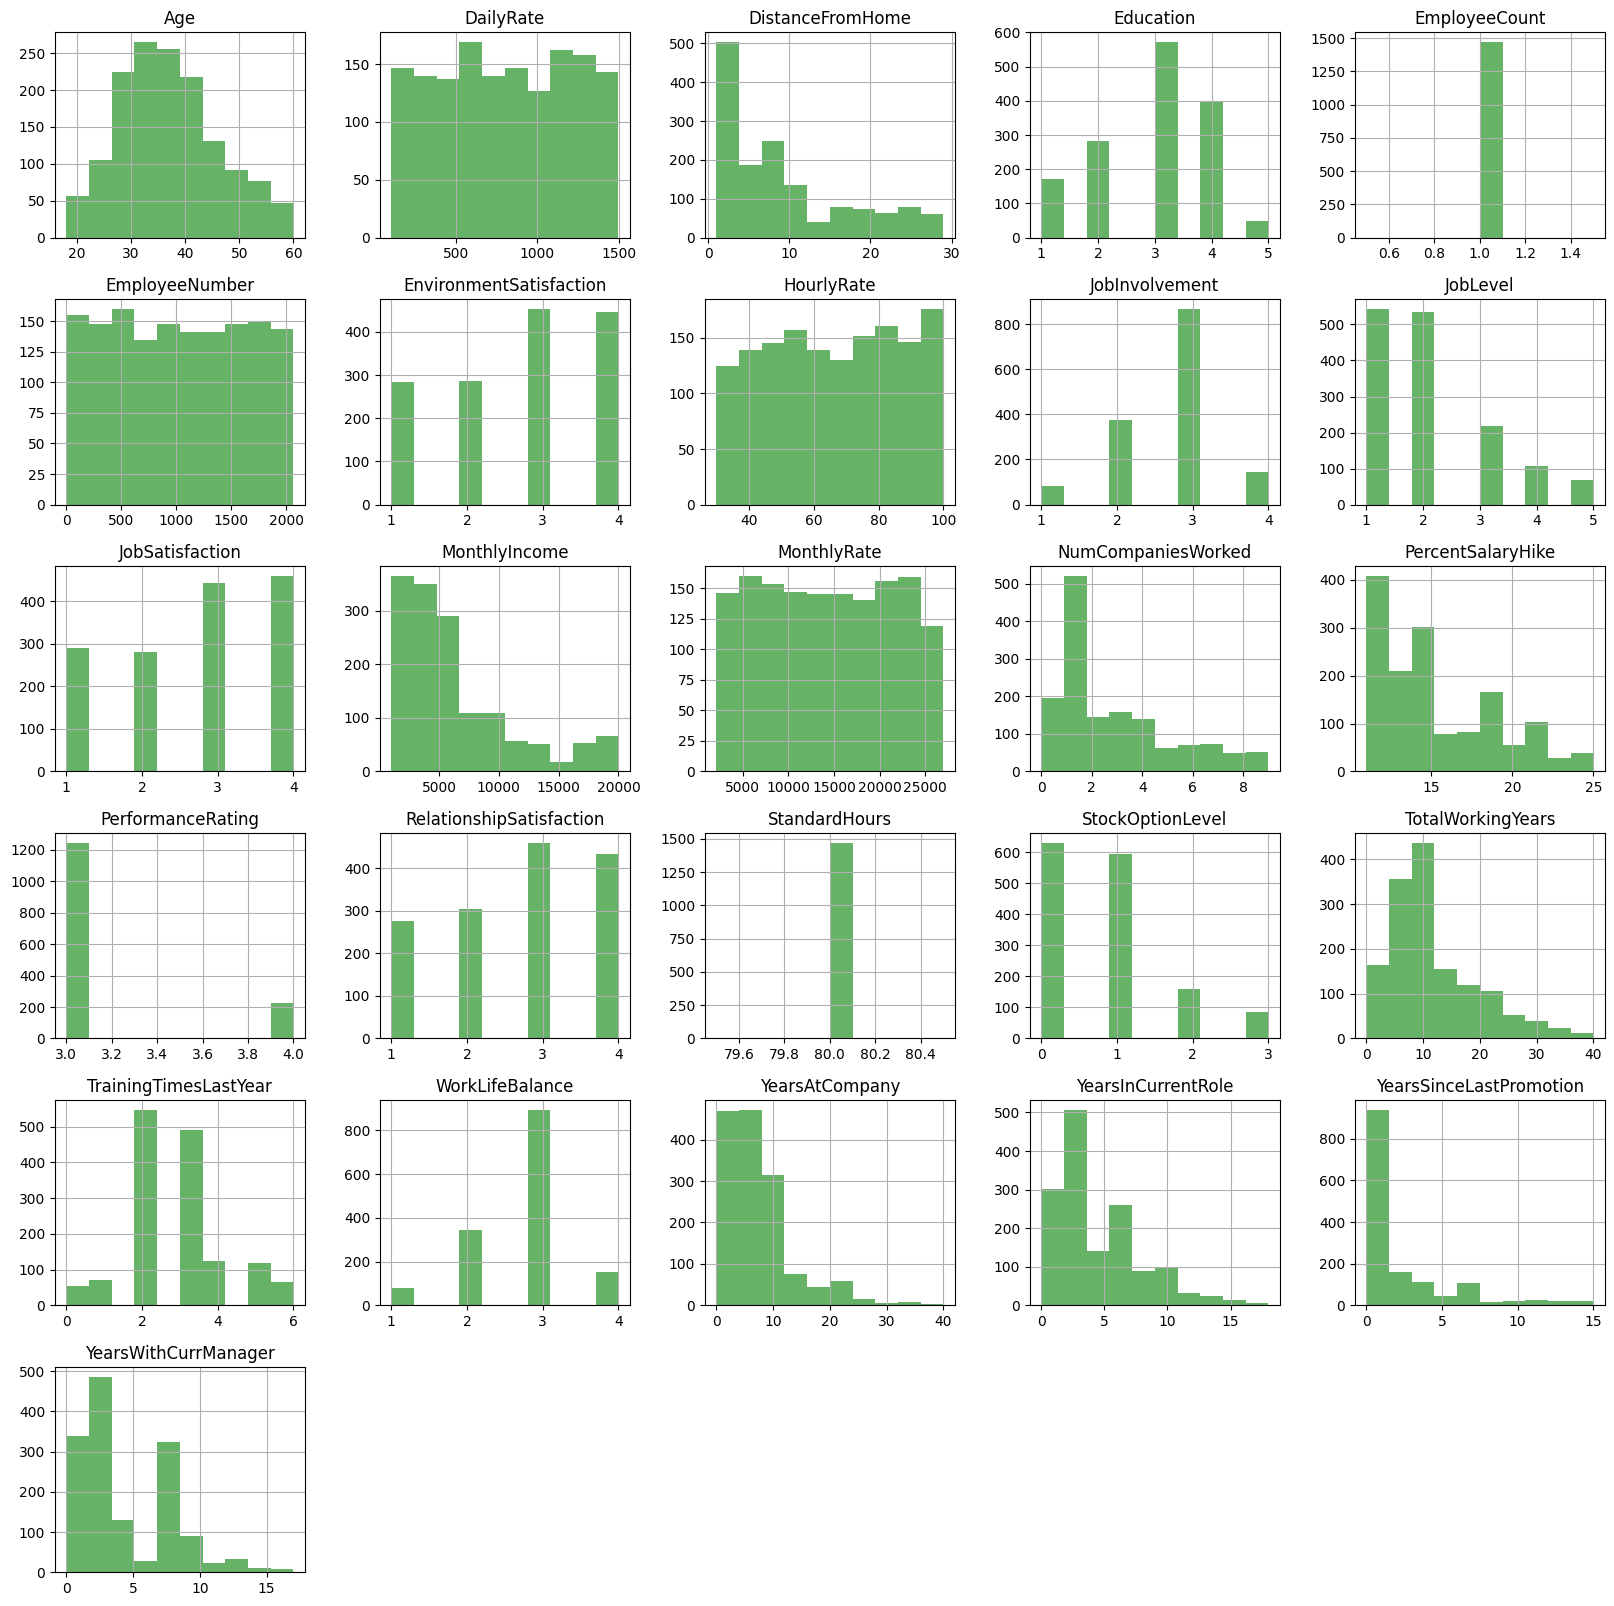

In [ ]:
df.hist(figsize=(20,20),color='g',alpha=0.6)

## **Exploratory Data Analysis (EDA)**

<ipython-input-10-42a8f7a4423a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition',y='Age',data=df,palette={'Yes':'Blue','No':'Red'})


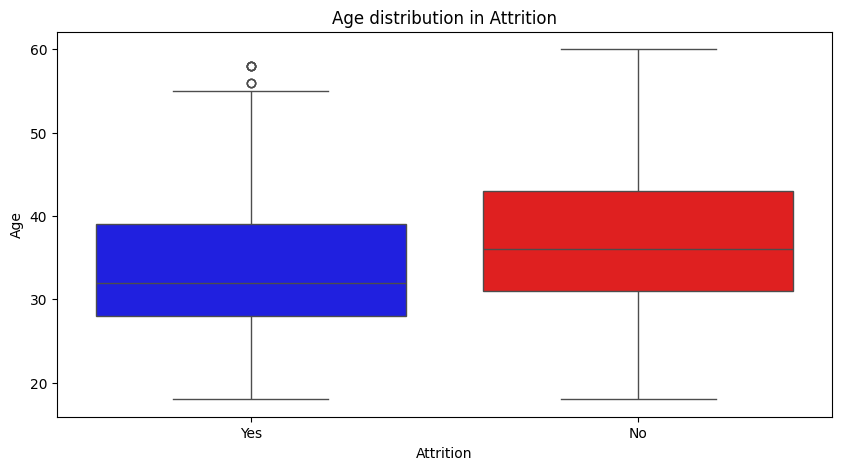

In [ ]:
# Age Attrition distribution
plt.figure(figsize=(10,5))
sns.boxplot(x='Attrition',y='Age',data=df,palette={'Yes':'Blue','No':'Red'})
plt.title('Age distribution in Attrition')
plt.show()

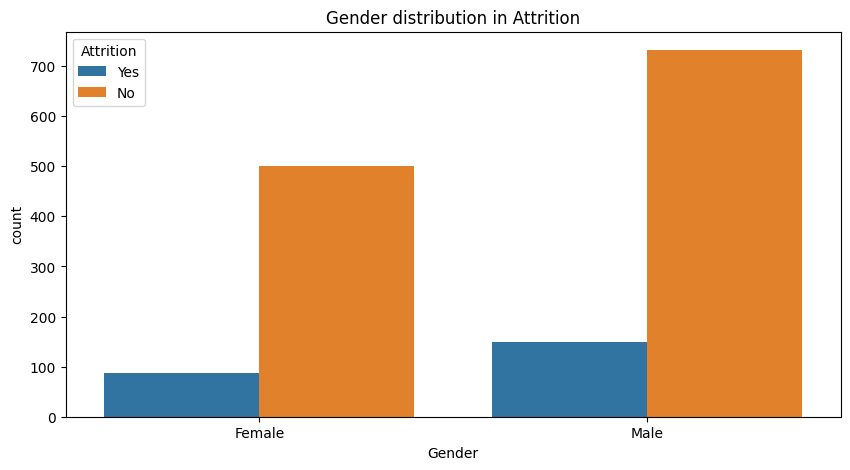

In [ ]:
# Gender Attrition Distribution
count = df.groupby(['Gender', 'Attrition']).size().unstack(fill_value=0)
plt.figure(figsize=(10,5))
sns.countplot(x='Gender',data=df,hue='Attrition')
plt.title('Gender distribution in Attrition')
plt.show()

<Figure size 1000x500 with 0 Axes>

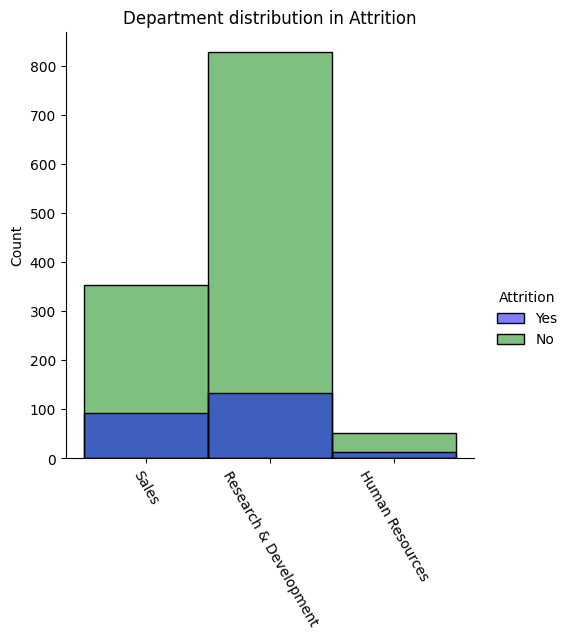

In [ ]:
# Department Attrition Distribution
count = df.groupby(['Department', 'Attrition']).size().unstack(fill_value=0)
plt.figure(figsize=(10,5))
plot=sns.displot(x='Department',data=df,hue='Attrition',palette={'Blue','Green'})
plot.set(xlabel=None)
plt.xticks(rotation=300)
plt.title('Department distribution in Attrition')
plt.show()

<ipython-input-14-0517207b7020>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition',y='DistanceFromHome',data=df,palette={'Yes':'Blue','No':'Red'})


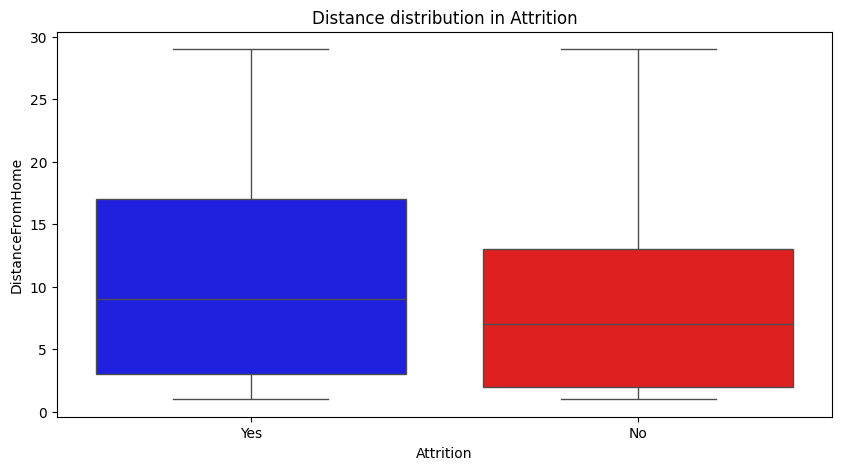

In [ ]:
# Distance Attrition distribution
plt.figure(figsize=(10,5))
sns.boxplot(x='Attrition',y='DistanceFromHome',data=df,palette={'Yes':'Blue','No':'Red'})
plt.title('Distance distribution in Attrition')
plt.show()

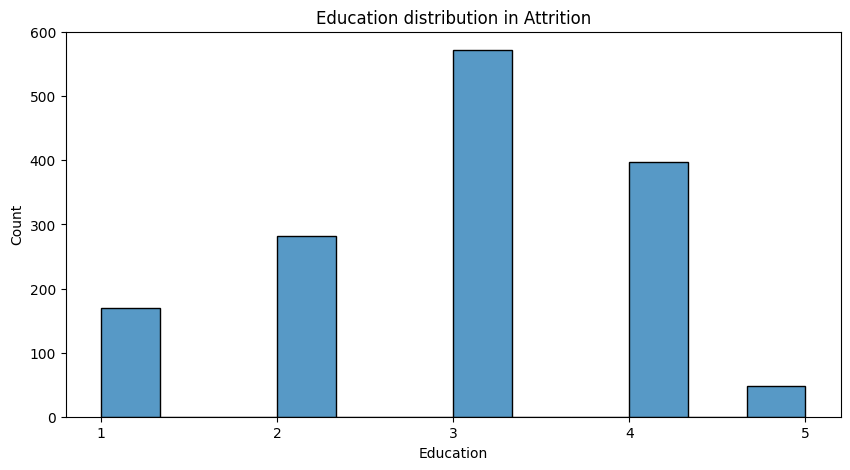

In [ ]:
# Education Level Attrition distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Education'])
plt.xticks([1,2,3,4,5])
plt.title('Education Level distribution in Attrition')
plt.show()

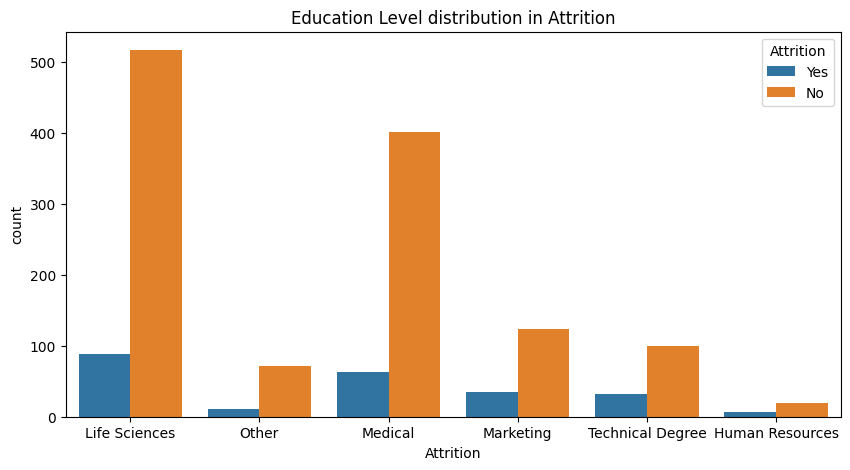

In [ ]:
# Education Field Attrition distribution
plt.figure(figsize=(10,5))
sns.countplot(x='EducationField',hue='Attrition',data=df)
# plt.xticks([1,2,3,4,5])
plt.xlabel('Attrition')
plt.title('Education Level distribution in Attrition')
plt.show()

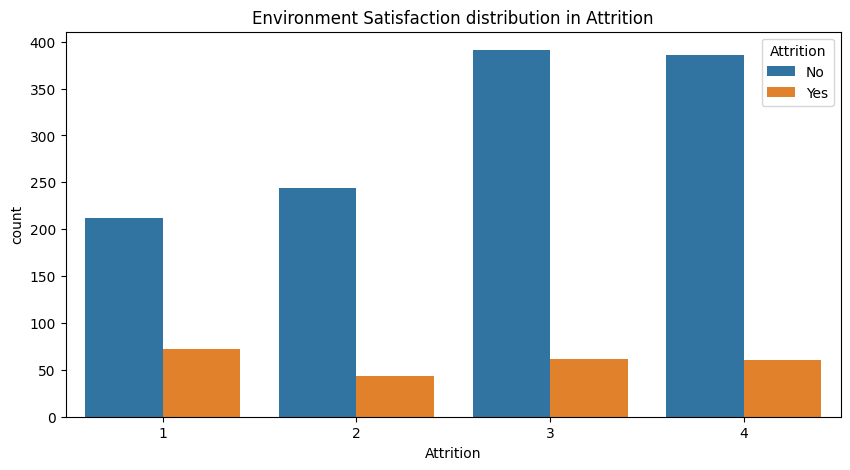

In [ ]:
# Environment Satisfaction Attrition distribution
plt.figure(figsize=(10,5))
sns.countplot(x='EnvironmentSatisfaction',data=df,hue='Attrition')
# plt.xticks([1,2,3,4,5])
plt.xlabel('Attrition')
plt.title('Environment Satisfaction distribution in Attrition')
plt.show()
# df['EnvironmentSatisfaction'].unique()

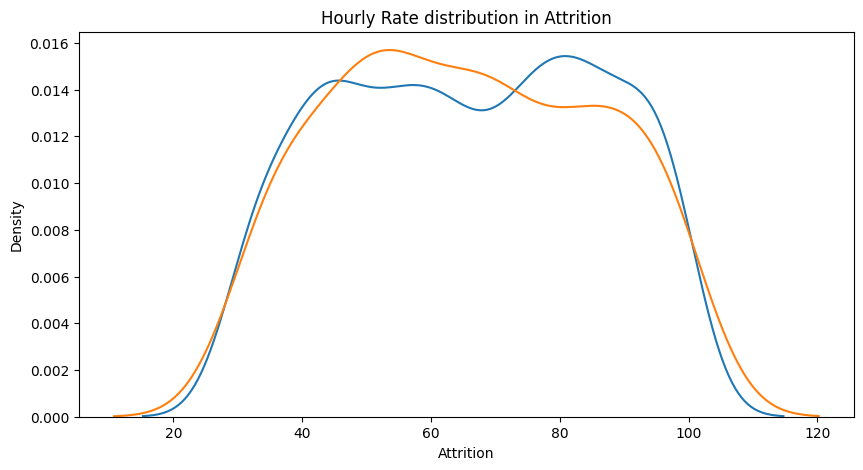

In [ ]:
# Hourly Rate Attrition distribution
plt.figure(figsize=(10,5))
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'HourlyRate'])
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'HourlyRate'])
# plt.xticks(rotation=90)
plt.xlabel('Attrition')
plt.title('Hourly Rate distribution in Attrition')
plt.show()
# df['EnvironmentSatisfaction'].unique()

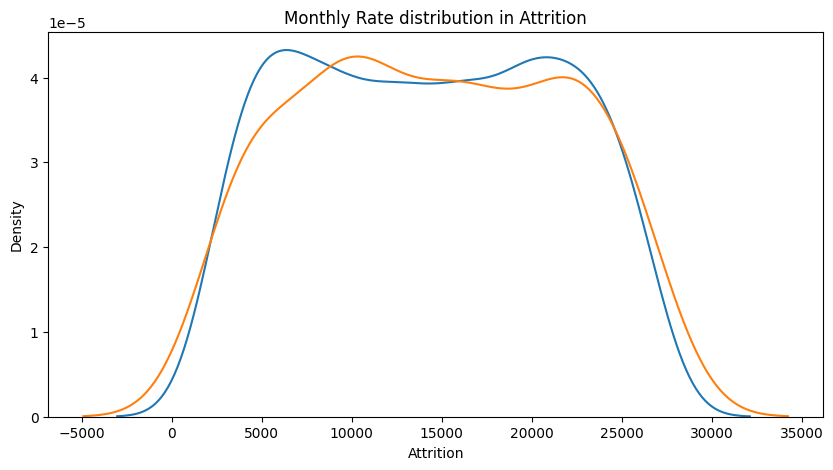

In [ ]:
# Monthly Rate Attrition distribution
plt.figure(figsize=(10,5))
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'MonthlyRate'])
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'MonthlyRate'])
# plt.xticks(rotation=90)
plt.xlabel('Attrition')
plt.title('Monthly Rate distribution in Attrition')
plt.show()
# df['EnvironmentSatisfaction'].unique()

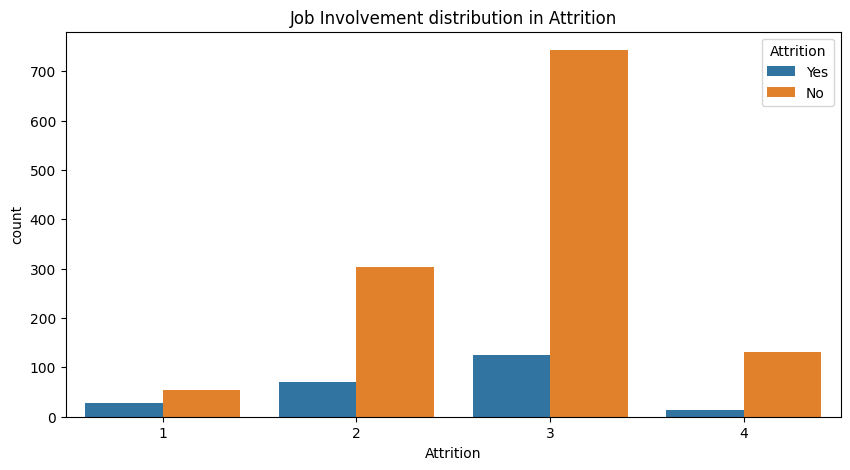

In [ ]:
# Job Involvement Attrition distribution
plt.figure(figsize=(10,5))
sns.countplot(x='JobInvolvement',data=df,hue='Attrition')
# plt.xticks([1,2,3,4,5])
plt.xlabel('Attrition')
plt.title('Job Involvement distribution in Attrition')
plt.show()
# df['JobInvolvement'].unique()

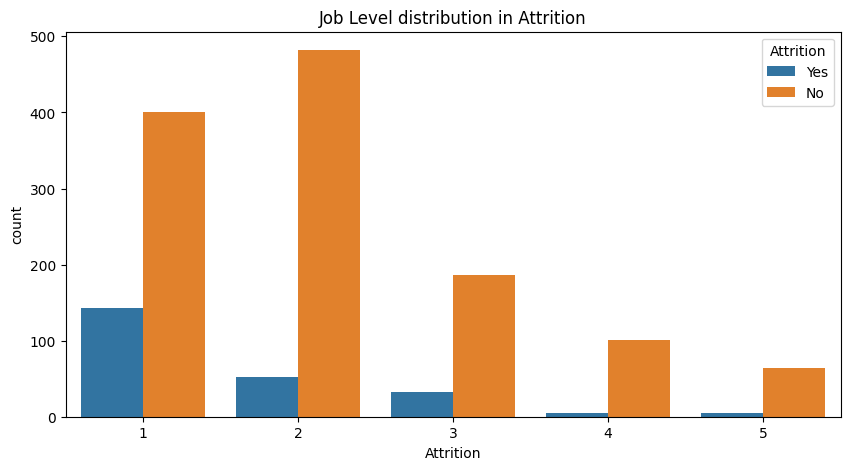

In [ ]:
# Job Level Attrition distribution
plt.figure(figsize=(10,5))
sns.countplot(x='JobLevel',data=df,hue='Attrition')
# plt.xticks([1,2,3,4,5])
plt.xlabel('Attrition')
plt.title('Job Level distribution in Attrition')
plt.show()
# df['JobLevel'].unique()

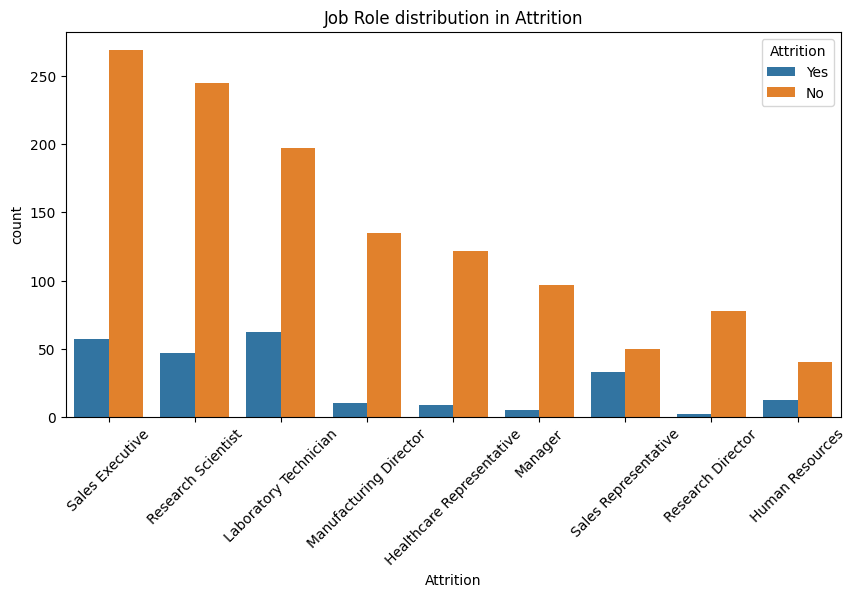

In [ ]:
# Job Role Attrition distribution
plt.figure(figsize=(10,5))
sns.countplot(x='JobRole',data=df,hue='Attrition')
plt.xticks(rotation=45)
plt.xlabel('Attrition')
plt.title('Job Role distribution in Attrition')
plt.show()
# df['JobRole'].unique()

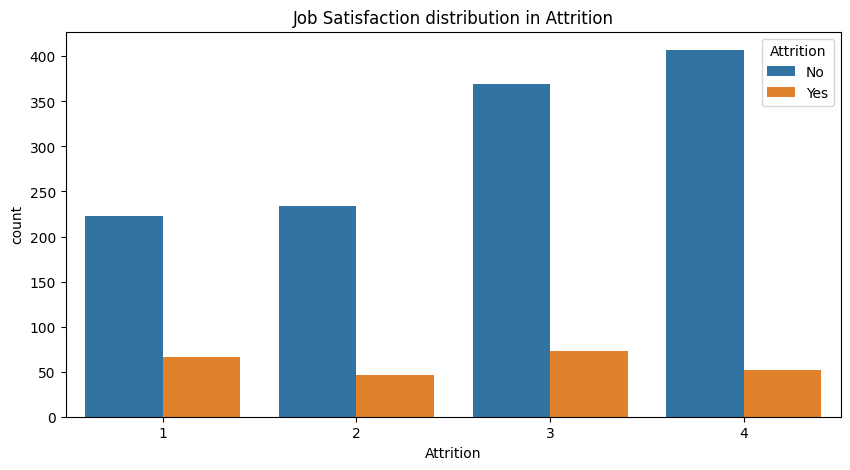

In [ ]:
# Job Satisfaction Attrition distribution
plt.figure(figsize=(10,5))
sns.countplot(x='JobSatisfaction',data=df,hue='Attrition')
# plt.xticks(rotation=45)
plt.xlabel('Attrition')
plt.title('Job Satisfaction distribution in Attrition')
plt.show()
# df['JobSatisfaction'].unique()

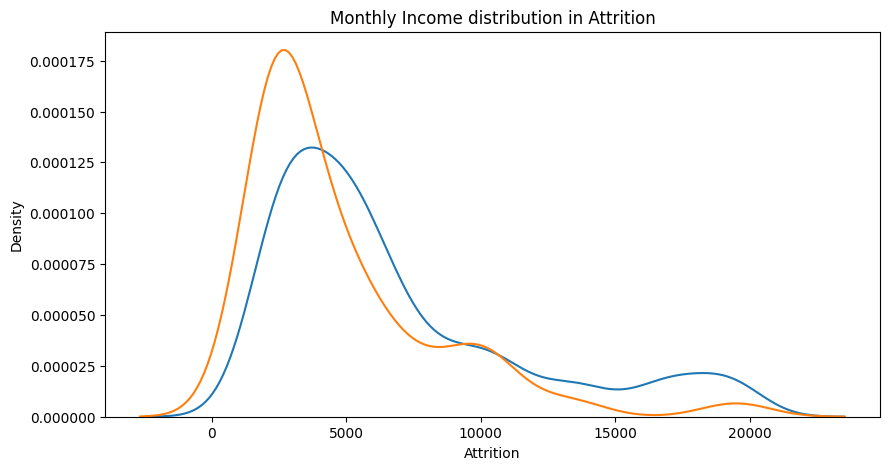

In [ ]:
# Monthly Income Attrition distribution
plt.figure(figsize=(10,5))
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'MonthlyIncome'])
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'MonthlyIncome'])
# plt.xticks(rotation=90)
plt.xlabel('Attrition')
plt.title('Monthly Income distribution in Attrition')
plt.show()
# df['EnvironmentSatisfaction'].unique()

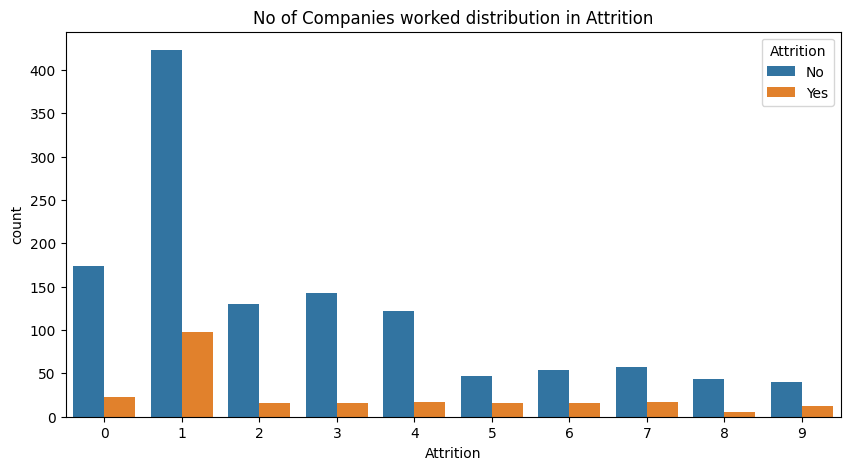

In [ ]:
# No of Companies worked Attrition distribution
plt.figure(figsize=(10,5))
sns.countplot(x='NumCompaniesWorked',data=df,hue='Attrition')
# plt.xticks(rotation=45)
plt.xlabel('Attrition')
plt.title('No of Companies worked distribution in Attrition')
plt.show()
# df['NumCompaniesWorked'].unique()

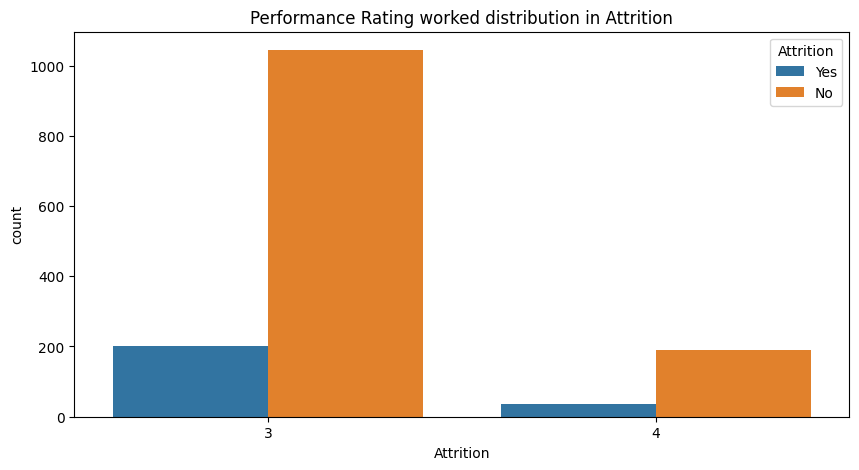

In [ ]:
# Performance Rating Attrition distribution
plt.figure(figsize=(10,5))
sns.countplot(x='PerformanceRating',data=df,hue='Attrition')
# plt.xticks(rotation=45)
plt.xlabel('Attrition')
plt.title('Performance Rating distribution in Attrition')
plt.show()
# df['PerformanceRating'].unique()

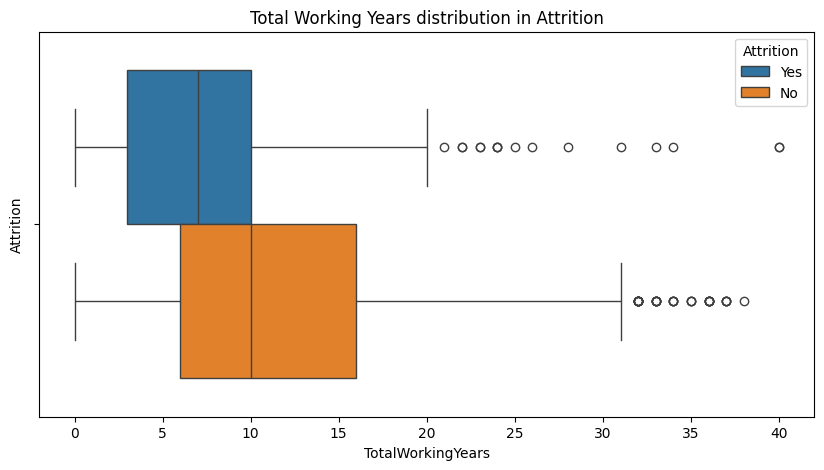

In [ ]:
# Total Working Years Attrition distribution
plt.figure(figsize=(10,5))
sns.boxplot(x='TotalWorkingYears',data=df,hue='Attrition')
# plt.xticks(rotation=45)
plt.ylabel('Attrition')
plt.title('Total Working Years distribution in Attrition')
plt.show()
# df['TotalWorkingYears'].unique()

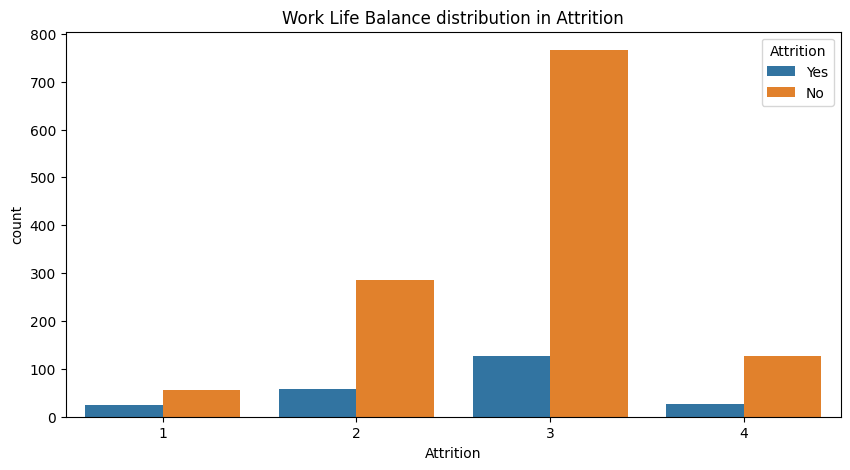

In [ ]:
# Work Life Balance Attrition distribution
plt.figure(figsize=(10,5))
sns.countplot(x='WorkLifeBalance',data=df,hue='Attrition')
# plt.xticks(rotation=45)
plt.xlabel('Attrition')
plt.title('Work Life Balance distribution in Attrition')
plt.show()
# df['WorkLifeBalance'].unique()

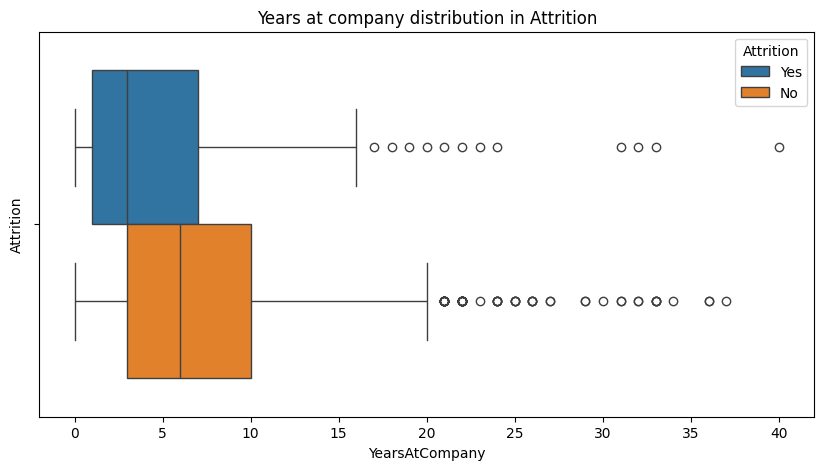

In [ ]:
# Years at company Attrition distribution
plt.figure(figsize=(10,5))
sns.boxplot(x='YearsAtCompany',data=df,hue='Attrition')
# plt.xticks(rotation=45)
plt.ylabel('Attrition')
plt.title('Years at company distribution in Attrition')
plt.show()
# df['YearsAtCompany'].unique()

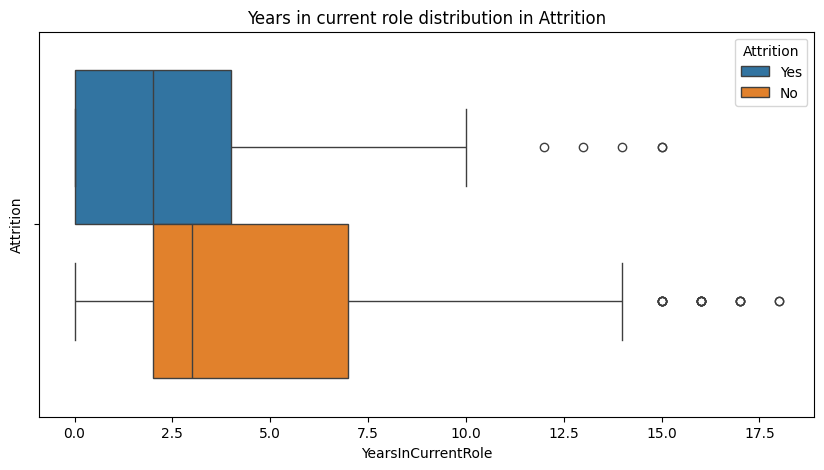

In [ ]:
# Years in current role Attrition distribution
plt.figure(figsize=(10,5))
sns.boxplot(x='YearsInCurrentRole',data=df,hue='Attrition')
# plt.xticks(rotation=45)
plt.ylabel('Attrition')
plt.title('Years in current role distribution in Attrition')
plt.show()
# df['YearsInCurrentRole'].unique()

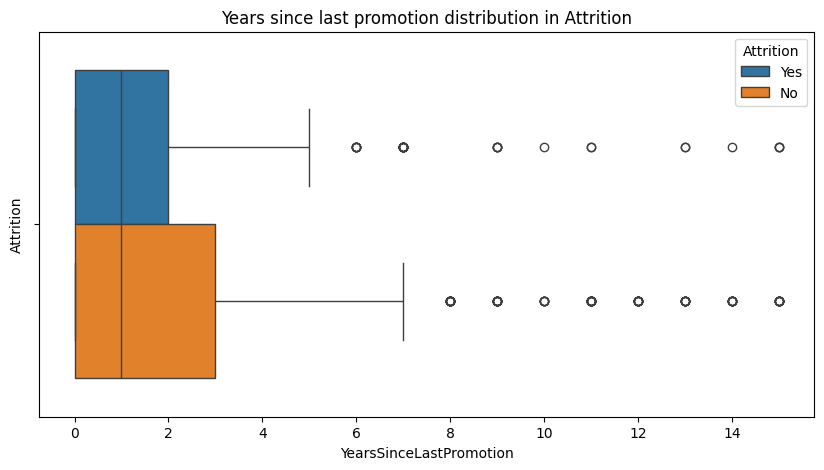

In [ ]:
# Years since last promotion Attrition distribution
plt.figure(figsize=(10,5))
sns.boxplot(x='YearsSinceLastPromotion',data=df,hue='Attrition')
# plt.xticks(rotation=45)
plt.ylabel('Attrition')
plt.title('Years since last promotion distribution in Attrition')
plt.show()
# df['YearsSinceLastPromotion'].unique()

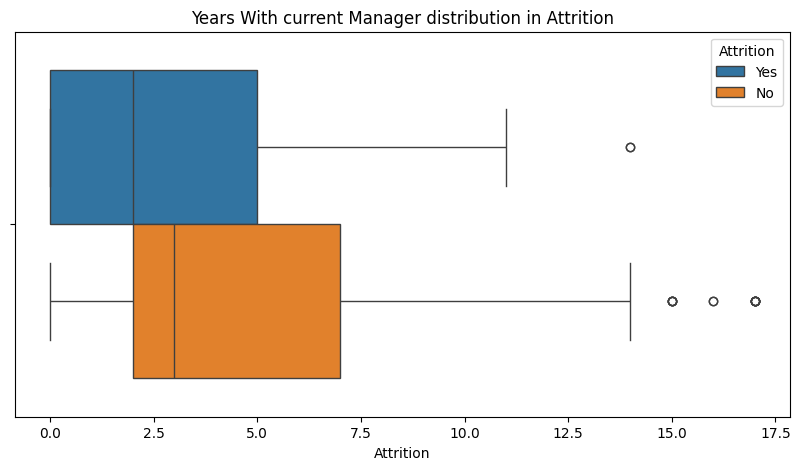

In [ ]:
# Years With current Manager Attrition distribution
plt.figure(figsize=(10,5))
sns.boxplot(x='YearsWithCurrManager',data=df,hue='Attrition')
# plt.xticks(rotation=45)
plt.xlabel('Attrition')
plt.title('Years With current Manager distribution in Attrition')
plt.show()
# df['YearsWithCurrManager'].unique()